In [1]:
import numpy as np
import skimage.io as io
import skimage
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import math



In [2]:
def checkpoint( h, k, x, y, a, b):
 
    # checking the equation of
    # ellipse with the given point
    p1 = math.pow((x - h), 2.0) / math.pow(a, 2)
    p2 = math.pow((y - k), 2.0) / math.pow(b, 2)
    p = p1 + p2
    return p

for x in range(0,20):
    line = ""
    for y in range(0,20):
        p = checkpoint(10,10,x,y,10,10)
        if p <= 1.0:
            line += "*"
        else: 
            line+= "#"
    print(line)
    


##########*#########
######*********#####
####*************###
###***************##
##*****************#
##*****************#
#*******************
#*******************
#*******************
#*******************
********************
#*******************
#*******************
#*******************
#*******************
##*****************#
##*****************#
###***************##
####*************###
######*********#####


In [3]:

def get_color(img,x,y,xax,yax):
    
    rows , columns, channels= img.shape

    i1 = round(x - xax/2)
    i2 = round(x + xax/2)
    j1 = round(y - yax/2)
    j2 = round(y + yax/2)

    av = []
    bv = []
    Lv = []
    for i in range(i1,i2):
        if i < 0 or i >= columns: continue
        for j in range(j1,j2):
            if j < 0 or j >= rows: continue

            if checkpoint(x,y,i,j,xax/2,yax/2) <= 1:    
                red , green , blue , a = img[j,i]     
                L , a , b = skimage.color.rgb2lab((red,green,blue))
                av.append(a)
                bv.append(b)
                Lv.append(L)
                
    if len(Lv) == 0: return [0,0,0]
    
    return [np.median(Lv),np.median(av),np.median(bv)]

def draw_ellipses(path,Lmin,Smin):
    I = io.imread(path)

    if I.shape[2] == 3:
        I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);


    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')

    rows , columns, channels= I.shape
    print(rows , columns, channels) 

    
    nimg = np.copy(I)


    
    threshold = 100
    canny_output = cv2.Canny(I, threshold, threshold * 2)


    plt.imshow(canny_output)
    plt.show()

    contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for i, c in enumerate(contours):
        
        if c.shape[0] > 5:
            ellipse = cv2.fitEllipse(c)
            #print(ellipse)
            
            (x , y) , (xax,yax) , _ = ellipse

            #find circles
            if np.min([xax,yax]) * 3.5 < np.max([xax,yax]): continue;

            #with minsize
            if np.max([xax,yax]) < Smin: continue
            
            L, a , b = get_color(I,x,y,xax,yax)
            
            #dark
            if L < Lmin: continue
                
            #print("circle",x,y,"min",min(xax,yax),"max", max(xax,yax),"L",L,"a",a,"b",b)

            
                
                
            cv2.ellipse(nimg, ellipse, (255,255,255), 2)
        # contour
        #cv2.drawContours(nimg, contours, i, (255,255,255))
    
    plt.imshow(nimg)


306 169 4


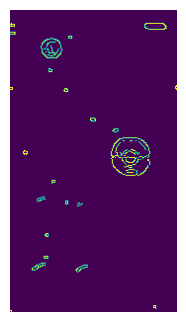

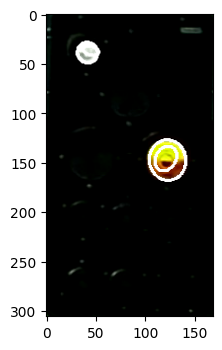

In [4]:
draw_ellipses('data/traffic_light.png',5,15)

370 201 4


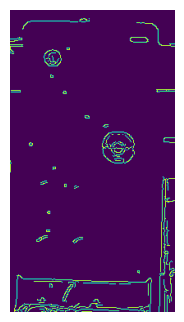

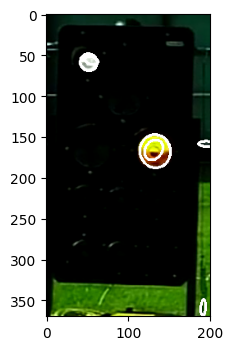

In [4]:
draw_ellipses('data/drohne-signals/traffic_light0032.png',5,15)

200 100 4


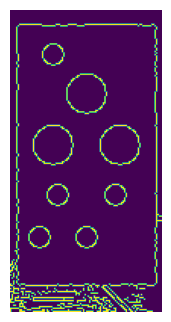

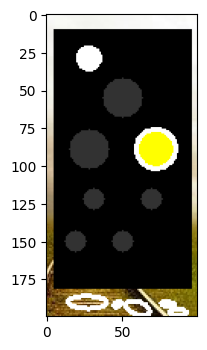

In [13]:
draw_ellipses("data/gen-signals/kshauptsignal2_Ks2_vBw.png",25,5)

774 444 4


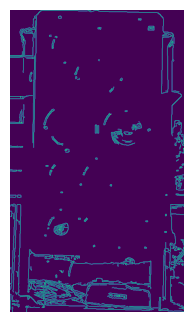

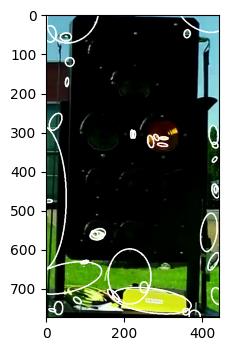

In [5]:
draw_ellipses("data/drohne-signals/traffic_light0011.png",5,15)

774 444 4


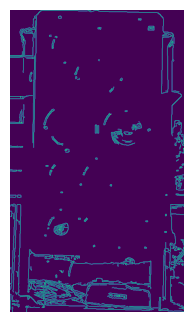

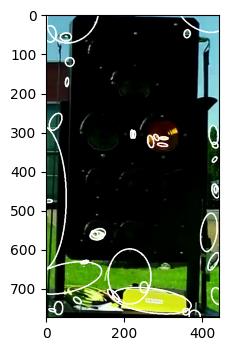

In [6]:
draw_ellipses("data/drohne-signals/traffic_light0011.png",5,15)

713 405 4


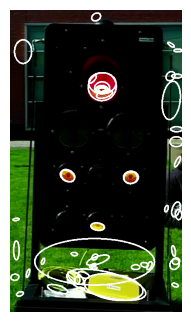

In [189]:
draw_ellipses("data/drohne-signals/traffic_light0029.png",5,15)

400 300 4


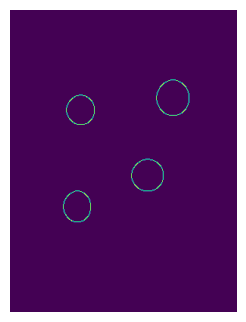

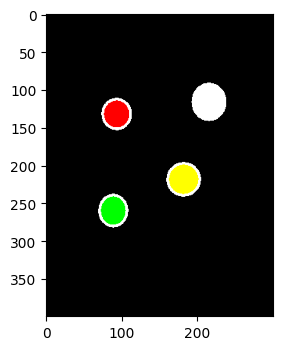

In [7]:
draw_ellipses("data/color_bubbles.png",5,15)

235 129 4


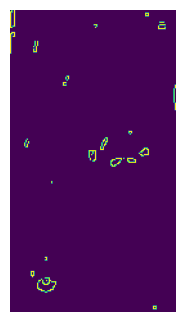

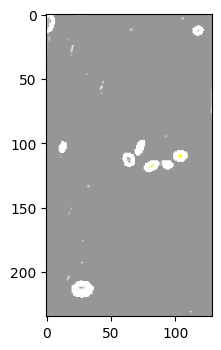

In [13]:
draw_ellipses("data/color_filtered.png",5,5)